Model: "AIEN"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_8       │ (None, 11)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1328 (Dense)  │ (None, 11)        │        132 │ input_layer_8[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1329 (Dense)  │ (None, 11)        │        132 │ dense_1328[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1330 (Dense)  │ (None, 11)        │        132 │ dense_1329[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1331 (Dense)  │ (None, 11)        │        132 │ dense_1330[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1332 (Dense)  │ (None, 11)        │        132 │ dense_1331[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1333 (Dense)  │ (None, 11)        │        132 │ dense_1332[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1334 (Dense)  │ (None, 11)        │        132 │ dense_1333[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1335 (Dense)  │ (None, 11)        │        132 │ dense_1334[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1336 (Dense)  │ (None, 11)        │        132 │ dense_1335[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1337 (Dense)  │ (None, 11)        │        132 │ dense_1336[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1338 (Dense)  │ (None, 11)        │        132 │ dense_1337[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1339 (Dense)  │ (None, 11)        │        132 │ dense_1338[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1340 (Dense)  │ (None, 11)        │        132 │ dense_1338[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lambda_4 (Lambda)   │ (None, 11)        │          0 │ dense_1339[0][0], │
│                     │                   │            │ dense_1340[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Enhancer            │ (None, 11)        │      2,904 │ lambda_4[0][0]    │
│ (Functional)        │                   │            │                   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 4,620 (18.05 KB)

 Trainable params: 4,620 (18.05 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100, Loss: 181710688.0000
New best model saved with loss: 181710688.0000
Epoch 2/100, Loss: 181735904.0000
Epoch 3/100, Loss: 182440816.0000
Epoch 4/100, Loss: 192446976.0000
Epoch 5/100, Loss: 764553728.0000
Epoch 6/100, Loss: 184748949504.0000
Epoch 7/100, Loss: 38763061313536.0000
Epoch 8/100, Loss: 304523411456.0000
Epoch 9/100, Loss: 6745825280.0000
Epoch 10/100, Loss: 317039424.0000
Epoch 11/100, Loss: 216710208.0000
Epoch 12/100, Loss: 203238656.0000
Epoch 13/100, Loss: 191603504.0000
Epoch 14/100, Loss: 187639280.0000
Epoch 15/100, Loss: 184878800.0000
Epoch 16/100, Loss: 182697072.0000
Epoch 17/100, Loss: 182404896.0000
Epoch 18/100, Loss: 182068672.0000
Epoch 19/100, Loss: 181883872.0000
Epoch 20/100, Loss: 181914224.0000
Epoch 21/100, Loss: 181876304.0000
Epoch 22/100, Loss: 181805344.0000
Epoch 23/100, Loss: 181802640.0000
Epoch 24/100, Loss: 181792496.0000
Epoch 25/100, Loss: 181772656.0000
Epoch 26/100, Loss: 181767328.0000
Epoch 27/100, Loss: 181748032.0000
Epoch

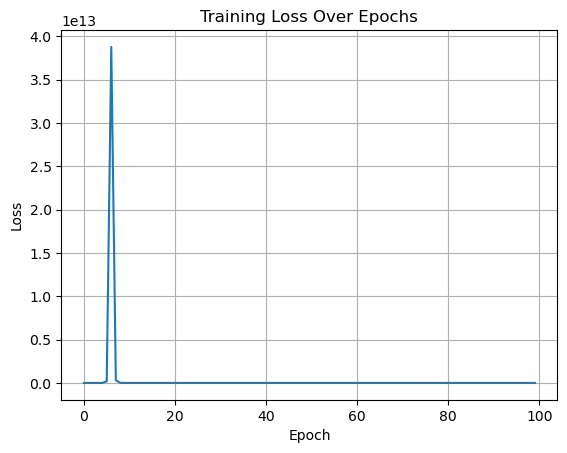

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Synthetic data saved to synthetic_data_1.csv


In [5]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers, models, regularizers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt
from sklearn.neighbors import KernelDensity
from sklearn.metrics import pairwise_distances

# ==============================
# AdaptiveKDE Class
# ==============================
class AdaptiveKDE:
    def __init__(self, data, base_bandwidth=1.0, k=3):
        self.data = data
        self.k = k
        self.base_bandwidth = base_bandwidth
        self.kdes = []
        self._fit_adaptive_kde()

    def _fit_adaptive_kde(self):
        distances = pairwise_distances(self.data)
        for i in range(self.data.shape[0]):
            local_bandwidth = self.base_bandwidth * np.mean(np.sort(distances[i])[:self.k])
            kde = KernelDensity(kernel='gaussian', bandwidth=local_bandwidth)
            kde.fit(self.data)
            self.kdes.append(kde)

    def log_prob(self, samples):
        log_probs = np.zeros(samples.shape[0])
        for kde in self.kdes:
            log_probs += kde.score_samples(samples)
        return log_probs / len(self.kdes)

# ==============================
# AIENs Architecture
# ==============================
def build_aien(input_dim):
    # Initialiser
    initialiser_input = layers.Input(shape=(input_dim,))
    x = initialiser_input
    for _ in range(1 * input_dim):
        x = layers.Dense(input_dim, activation='relu')(x)
    mu = layers.Dense(input_dim)(x)
    logvar = layers.Dense(input_dim)(x)
    z = layers.Lambda(lambda p: p[0] + tf.random.normal(tf.shape(p[0])) * tf.exp(0.5 * p[1]))([mu, logvar])

    # Enhancer
    enhancer_input = layers.Input(shape=(input_dim,))
    y = enhancer_input
    for _ in range(2 * input_dim):
        y = layers.Dense(input_dim, activation='relu')(y)
    enhanced_output = y

    # aien Model
    enhancer_model = models.Model(enhancer_input, enhanced_output, name="Enhancer")
    reconstructed = enhancer_model(z)

    aien_model = models.Model(initialiser_input, [reconstructed, mu, logvar], name="AIEN")
    return aien_model, enhancer_model

# ==============================
# Loss Function with KL Divergence
# ==============================
import tensorflow as tf

def aien_loss(y_true, y_pred, mu, logvar, adaptive_kde, beta=1.0):
    # MSE Loss for reconstruction
    mse_loss = tf.reduce_mean(tf.keras.losses.mean_squared_error(y_true, y_pred))

    # KL Divergence (z sampled from latent space)
    z = mu + tf.exp(0.5 * logvar) * tf.random.normal(tf.shape(mu))  # Reparameterization trick
    
    # Get log probability from Adaptive KDE
    kde_log_prob = adaptive_kde.log_prob(z.numpy())
    
    # Convert kde_log_prob to TensorFlow tensor with the same dtype as mse_loss
    kde_log_prob_tensor = tf.convert_to_tensor(kde_log_prob, dtype=mse_loss.dtype)
    
    # AIEN KL Divergence loss
    kl_div = tf.reduce_mean(kde_log_prob_tensor)

    # Final AIEN loss: combining MSE + KL divergence loss (scaled by beta)
    return mse_loss - beta * kl_div



# ==============================
# Data Loading
# ==============================
def load_data(file_path):
    data = pd.read_csv(file_path, header=None)
    numeric_data = data.iloc[:, :-6].values  # Assuming numeric data columns
    return numeric_data

def save_synthetic_data(synthetic_data, output_file):
    columns = ['Feature_' + str(i+1) for i in range(synthetic_data.shape[1])]
    synthetic_df = pd.DataFrame(np.round(synthetic_data, 4), columns=columns)
    synthetic_df['Class'] = "SEKER"
    synthetic_df.to_csv(output_file, index=False)
    print(f"Synthetic data saved to {output_file}")

# ==============================
# Training Process
# ==============================

def train_aien_and_save_best(model, dataset, adaptive_kde, epochs=100, batch_size=50, beta=1.0, save_path="best_aien_model.weights.h5"):
    opt = tf.keras.optimizers.Adam()
    best_loss = float('inf')
    epoch_losses = []

    for epoch in range(epochs):
        epoch_loss = 0
        for step in range(0, len(dataset), batch_size):
            x_batch = dataset[step:step + batch_size]
            with tf.GradientTape() as tape:
                y_pred, mu, logvar = model(x_batch)
                loss = aien_loss(x_batch, y_pred, mu, logvar, adaptive_kde, beta)

            gradients = tape.gradient(loss, model.trainable_weights)
            opt.apply_gradients(zip(gradients, model.trainable_weights))
            epoch_loss += loss.numpy()

        epoch_losses.append(epoch_loss)
        print(f"Epoch {epoch + 1}/{epochs}, Loss: {epoch_loss:.4f}")

        # Save the best model based on loss
        if epoch_loss < best_loss:
            best_loss = epoch_loss
            model.save_weights(save_path)
            print(f"New best model saved with loss: {best_loss:.4f}")

    return epoch_losses


# ==============================
# Main Script
# ==============================
if __name__ == "__main__":
    input_file = "bean1.csv"
    dataset = load_data(input_file)
    adaptive_kde = AdaptiveKDE(dataset)
    
    input_dim = dataset.shape[1]
    vae, enhancer = build_aien(input_dim)

    # Model Summary
    vae.summary()

    # Train and Save Model
    epoch_losses = train_aien_and_save_best(vae, dataset, adaptive_kde, epochs=100, batch_size=50)

    # Plot Training Loss
    plt.plot(range(len(epoch_losses)), epoch_losses)
    plt.title("Training Loss Over Epochs")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.grid(True)
    plt.show()

    # Generate Synthetic Data
    latent_samples = np.random.normal(size=(500, input_dim))
    synthetic_data = enhancer.predict(latent_samples)
    save_synthetic_data(synthetic_data, "synthetic_data_1.csv")
